# Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused
products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat
executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

# Ask
Business Task 
The business task is: Identify trends in how consumers use non-Bellabeat smart devices and use this information to help inform Bellabeat’s marketing strategy.

Stakeholders 
Key stakeholders to consider are:

Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer.
Sando Mur: Bellabeat’s cofounder; key member of the Bellabeat executive team.
Marketing Team: Involved in developing Bellabeat's marketing strategies.

# Prepare
Sršen encourages you to use public data that explores smart device users’ daily habits. She points you to a specific data set:
1. The data FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): is available on Kaggle data set
2. The data is in long format.
3. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.
4. Data is incomplete and lack various important data variables like "Gender", "Age", "Any Diseases".
5. The sample size is small, with only 33 distinct users contributing to the datase.
6. Also the data is of 2016 which means it is not updated recently.

Installing and loading the required packages:

In [1]:
#Statistic packages
library(tidyverse)

#Plot visulazation
library(ggplot2)

#This packages for organize about date format right
library(lubridate)

#This package for data manipulation like 'filter','arrange','select','summarise' and 'mutate'
#for streamlined data table operations
library(dplyr)

#For organizing and structuring data in a clean, consistent, and easy-to-analyze format
library(tidyr)

#to provide summary statistics about variables in data frames, tibbles, data tables and vectors
library(skimr)

#The janitor functions expedite the initial data exploration and cleaning that comes with any new data set
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Loading the required csv files

In [2]:
activity_daily <- read.csv("/kaggle/input/fitbit-data/dailyActivity_merged.csv")
Daily_Calories <- read.csv("/kaggle/input/fitbit-data/dailyCalories_merged.csv")
Daily_Intensities <- read.csv("/kaggle/input/fitbit-data/dailyIntensities_merged.csv")
Sleep_Day_info <- read.csv("/kaggle/input/fitbit-data/sleepDay_merged.csv")
Weight_Log <- read.csv("/kaggle/input/fitbit-data/weightLogInfo_merged.csv")
HourlyCalories_merged <- read.csv("/kaggle/input/fitbit-data/hourlyCalories_merged.csv")
Hourly_Intensities <- read.csv("/kaggle/input/fitbit-data/hourlyIntensities_merged.csv")
Hourly_Steps <- read.csv("/kaggle/input/fitbit-data/hourlySteps_merged.csv")
Daily_Steps <- read.csv("/kaggle/input/fitbit-data/dailySteps_merged.csv")



<iframe src="https://www.kaggle.com/embed/laracarter/bellabeat-an-r-analysis?cellIds=9&kernelSessionId=164711544" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Bellabeat: An R Analysis"></iframe>

# Exploring the data

We will now explore each table and check the data type of all variables.

In [3]:
#creating a list for all these data variables
dataVariablesList <- list(activity_daily,
                           Daily_Calories,
                           Daily_Intensities,
                           Sleep_Day_info,
                           Weight_Log,
                           HourlyCalories_merged,
                           Hourly_Intensities,
                           Hourly_Intensities, 
                           Hourly_Steps,
                           Daily_Steps)

for (data in dataVariablesList) {
  print(head(data))
}

for (data in dataVariablesList) {
  print(str(data))
}

          Id ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366    4/12/2016      13162          8.50            8.50
2 1503960366    4/13/2016      10735          6.97            6.97
3 1503960366    4/14/2016      10460          6.74            6.74
4 1503960366    4/15/2016       9762          6.28            6.28
5 1503960366    4/16/2016      12669          8.16            8.16
6 1503960366    4/17/2016       9705          6.48            6.48
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1                        0               1.88                     0.55
2                        0               1.57                     0.69
3                        0               2.44                     0.40
4                        0               2.14                     1.26
5                        0               2.71                     0.41
6                        0               3.19                     0.78
  LightActiveDistance SedentaryAct

# Preparing the data

Checking and removing for duplicate data.
For preparing data I am choosing R as it is more effective for analyses, data cleaning and wrangling operations and also advanced visualisations
Transforming the Date field from character datatype to date datatype
Then changing fields names to lower from upper so all field names are uniform.

In [4]:
#checking distinct IDs in each dataset
for(data in dataVariablesList){
  print(n_distinct(data$Id))
}

#checking for total duplicate values
for(data in dataVariablesList){
  print(sum(duplicated(data)))
}

#correcting date format for all the date fields in data
activity_daily$ActivityDate <- as.Date(activity_daily$ActivityDate, format = "%m/%d/%Y")
Daily_Calories$ActivityDate <- as.Date(Daily_Calories$ActivityDay, format = "%m/%d/%Y")
Daily_Intensities$ActivityDay <- as.Date(Daily_Intensities$ActivityDay, format = "%m/%d/%y")
Daily_Steps$ActivityDay <- as.Date(Daily_Steps$ActivityDay, format = "%m/%d/%y")
Sleep_Day_info$SleepDay <- as.Date(Sleep_Day_info$SleepDay, format = "%m/%d/%Y %I:%M:%S %p")
Weight_Log$Date <- as.Date(Weight_Log$Date, format = "%m/%d/%Y %I:%M:%S %p")

Sleep_Day_info <- separate(Sleep_Day_info, col = SleepDay, into = c('date', 'time'), sep = ' ')

[1] 33
[1] 33
[1] 33
[1] 24
[1] 8
[1] 33
[1] 33
[1] 33
[1] 33
[1] 33
[1] 0
[1] 0
[1] 0
[1] 3
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 413 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


By Exploring the data and in the prepare phase we found out that 
1. Activity Date column is not having correct datatype
2. Sleep_day_info csv file have 3 duplicate values 
3. Data is not consistent as we can see in some csv files there are 33 ids and in some there are 24 or even 8
4. Also we can see that there is no gender column which is major missing thing as the company "Bellabeat" specifically works for women fitness.

# Cleaning and Processing Data

In [5]:
#so we can see that Sleep_Day_info file contains 3 duplicate rows and we need to remove them

Sleep_Day_info <- Sleep_Day_info %>%
  distinct()

#check if the Sleep_Day_Info still have duplicate values

head(sum(duplicated(Sleep_Day_info)))

Sleep_Day_info %>%
  remove_empty("cols")


head(activity_daily)
head(Daily_Calories)
head(Daily_Intensities)
head(Daily_Steps)
head(Weight_Log)
head(Sleep_Day_info)

[1] 0

Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320
1503960366,2016-04-20,1,360,377
1503960366,2016-04-21,1,325,364
1503960366,2016-04-23,1,361,384


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityDay,Calories,ActivityDate
,<dbl>,<chr>,<int>,<date>
1,1503960366,4/12/2016,1985,2016-04-12
2,1503960366,4/13/2016,1797,2016-04-13
3,1503960366,4/14/2016,1776,2016-04-14
4,1503960366,4/15/2016,1745,2016-04-15
5,1503960366,4/16/2016,1863,2016-04-16
6,1503960366,4/17/2016,1728,2016-04-17


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2020-04-12,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,2020-04-13,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,2020-04-14,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,2020-04-15,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,2020-04-16,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,2020-04-17,539,164,20,38,0,2.51,0.78,3.19


,Id,ActivityDay,StepTotal
,<dbl>,<date>,<int>
1,1503960366,2020-04-12,13162
2,1503960366,2020-04-13,10735
3,1503960366,2020-04-14,10460
4,1503960366,2020-04-15,9762
5,1503960366,2020-04-16,12669
6,1503960366,2020-04-17,9705


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<date>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,2016-05-02,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,2016-05-03,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,2016-04-13,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,2016-04-21,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,2016-05-12,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,2016-04-17,72.4,159.6147,25,27.45,True,1.460938e+12


,Id,date,time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<chr>,<int>,<int>,<int>
1,1503960366,2016-04-12,NA,1,327,346
2,1503960366,2016-04-13,NA,2,384,407
3,1503960366,2016-04-15,NA,1,412,442
4,1503960366,2016-04-16,NA,2,340,367
5,1503960366,2016-04-17,NA,1,700,712
6,1503960366,2016-04-19,NA,1,304,320


In [6]:
#renaming date fields for all the data files

activity_daily <- activity_daily %>%
  rename(date = ActivityDate)

Daily_Calories <- Daily_Calories %>%
  rename(date = ActivityDay)

Daily_Intensities <- Daily_Intensities %>%
  rename(date = ActivityDay)

Daily_Steps <- Daily_Steps %>%
  rename(date = ActivityDay)

Weight_Log <- Weight_Log %>%
    rename(date = Date)

#Cleaning and formating column names to lowercase, to have consistent syntax and format across all datasets

for(data in dataVariablesList){
  clean_names(data)
}

activity_daily <- rename_with(activity_daily, tolower)
Daily_Calories <- rename_with(Daily_Calories, tolower)
Daily_Intensities <- rename_with(Daily_Intensities, tolower)
Daily_Steps <- rename_with(Daily_Steps, tolower)
Sleep_Day_info <- rename_with(Sleep_Day_info, tolower)
Weight_Log <- rename_with(Weight_Log, tolower)
head(Weight_Log)

,id,date,weightkg,weightpounds,fat,bmi,ismanualreport,logid
,<dbl>,<date>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,2016-05-02,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,2016-05-03,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,2016-04-13,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,2016-04-21,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,2016-05-12,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,2016-04-17,72.4,159.6147,25,27.45,True,1.460938e+12


# Analysing Data

Analysing the Daily Activity data by summarizing it and then getting mean values.

In [7]:
#getting mean summary of important columns in Daily Activity csv file.

DailyActivity_Data <- activity_daily %>% group_by(id) %>%
  summarize_at(c('totalsteps','totaldistance',
                 'calories',
                 'veryactiveminutes',
                 'fairlyactiveminutes',
                 'lightlyactiveminutes',
                 'sedentaryminutes',
                 'veryactivedistance',
                 'moderatelyactivedistance',
                 'lightactivedistance'),mean)

head(DailyActivity_Data)

#Getting overall summary of daily activity.
activity_daily %>%  
  select(totalsteps, totaldistance, sedentaryminutes, veryactiveminutes
         , fairlyactiveminutes
         , veryactivedistance
         , moderatelyactivedistance
         , calories) %>%
  summary()

#Getting insights for Sleep of users

summary(Sleep_Day_info)

id,totalsteps,totaldistance,calories,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,veryactivedistance,moderatelyactivedistance,lightactivedistance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,7.8096774,1816.419,38.7096774,19.1612903,219.93548,848.1613,2.858387113,0.79419354,4.1529032
1624580081,5743.903,3.9148387,1483.355,8.6774194,5.8064516,153.48387,1257.7419,0.939354843,0.36064516,2.6067742
1644430081,7282.967,5.2953334,2811.300,9.5666667,21.3666667,178.46667,1161.8667,0.730000001,0.95100000,3.6090000
1844505072,2580.065,1.7061290,1573.484,0.1290323,1.2903226,115.45161,1206.6129,0.008387097,0.04903226,1.6474193
1927972279,916.129,0.6345161,2172.806,1.3225806,0.7741935,38.58065,1317.4194,0.095806451,0.03129032,0.5070968
2022484408,11370.645,8.0841935,2509.968,36.2903226,19.3548387,257.45161,1112.5806,2.421612884,0.72000000,4.9425806


   totalsteps    totaldistance    sedentaryminutes veryactiveminutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :  0.00   
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:  0.00   
 Median : 7406   Median : 5.245   Median :1057.5   Median :  4.00   
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   : 21.16   
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.: 32.00   
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :210.00   
 fairlyactiveminutes veryactivedistance moderatelyactivedistance    calories   
 Min.   :  0.00      Min.   : 0.000     Min.   :0.0000           Min.   :   0  
 1st Qu.:  0.00      1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.:1828  
 Median :  6.00      Median : 0.210     Median :0.2400           Median :2134  
 Mean   : 13.56      Mean   : 1.503     Mean   :0.5675           Mean   :2304  
 3rd Qu.: 19.00      3rd Qu.: 2.053     3rd Qu.:0.8000           3rd Qu.:2793  
 Max.   :143.00      Max.   :21.920  

       id                date               time           totalsleeprecords
 Min.   :1.504e+09   Length:410         Length:410         Min.   :1.00     
 1st Qu.:3.977e+09   Class :character   Class :character   1st Qu.:1.00     
 Median :4.703e+09   Mode  :character   Mode  :character   Median :1.00     
 Mean   :4.995e+09                                         Mean   :1.12     
 3rd Qu.:6.962e+09                                         3rd Qu.:1.00     
 Max.   :8.792e+09                                         Max.   :3.00     
 totalminutesasleep totaltimeinbed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.8  
 Median :432.5      Median :463.0  
 Mean   :419.2      Mean   :458.5  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

Findings
1. From this data we can see that users walk around 7638 steps a day which is less than recommended (10k) steps
2. Also the sedentary minutes are much higher. For about 16 hours users remain ideal.
3. On an average 2304 calories are burnt 
4. Average distance of 5.49 km. 
5. Average calories burned  : 2304 per day  &  97 per hour
6. On average, users slept for 419 minutes or 7 hours per day.

In [8]:
#Categorizing users into "High", "Mild", "Low" active users based on their activity minutes

DailyActivity_Data$dailyTotalActMin <- DailyActivity_Data$lightlyactiveminutes 
+ DailyActivity_Data$fairlyactiveminutes + DailyActivity_Data$veryactiveminutes



CategorizeBy_DailySteps <- DailyActivity_Data %>% 
  mutate(active_level = case_when(
    dailyTotalActMin >= 300 ~"Very Active Users",
    dailyTotalActMin >= 200 & dailyTotalActMin < 300 ~"Medium Active Users",
    dailyTotalActMin < 200 ~ "Less Active Users"))

head(CategorizeBy_DailySteps)

ActivityLevel <- CategorizeBy_DailySteps %>%  
  group_by(active_level) %>% summarize(total = n()) %>% 
  mutate(percent = scales::percent(total/sum(total)))


View(ActivityLevel)

[1]  57.8709677  14.4838710  30.9333333   1.4193548   2.0967742  55.6451613
 [7]   0.3548387   3.9354839  34.0555556  20.2258065  13.2500000  80.1666667
[13]  10.5483871   2.2500000  15.9032258  43.5161290   8.3548387  24.0967742
[19]  31.1612903  36.4193548 117.1666667   3.6071429   6.5517241  25.8076923
[25]  41.3225806  47.3076923  67.9354839  94.7419355  34.8421053  68.9354839
[31]  31.8709677   5.0000000  76.0000000

id,totalsteps,totaldistance,calories,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,veryactivedistance,moderatelyactivedistance,lightactivedistance,dailyTotalActMin,active_level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,7.8096774,1816.419,38.7096774,19.1612903,219.93548,848.1613,2.858387113,0.79419354,4.1529032,219.93548,Medium Active Users
1624580081,5743.903,3.9148387,1483.355,8.6774194,5.8064516,153.48387,1257.7419,0.939354843,0.36064516,2.6067742,153.48387,Less Active Users
1644430081,7282.967,5.2953334,2811.300,9.5666667,21.3666667,178.46667,1161.8667,0.730000001,0.95100000,3.6090000,178.46667,Less Active Users
1844505072,2580.065,1.7061290,1573.484,0.1290323,1.2903226,115.45161,1206.6129,0.008387097,0.04903226,1.6474193,115.45161,Less Active Users
1927972279,916.129,0.6345161,2172.806,1.3225806,0.7741935,38.58065,1317.4194,0.095806451,0.03129032,0.5070968,38.58065,Less Active Users
2022484408,11370.645,8.0841935,2509.968,36.2903226,19.3548387,257.45161,1112.5806,2.421612884,0.72000000,4.9425806,257.45161,Medium Active Users


active_level,total,percent
<chr>,<int>,<chr>
Less Active Users,16,48.5%
Medium Active Users,15,45.5%
Very Active Users,2,6.1%


In [9]:
#Categorizing users sleep based on their sleeping minutes
SleepDay_Data <- Sleep_Day_info %>% group_by(id) %>%
  summarize_at(c('totalminutesasleep',
                 'totaltimeinbed'),mean)

head(SleepDay_Data)

CategorizeBy_DailySleep <- SleepDay_Data %>% 
  mutate(sleep_level = case_when(
    totalminutesasleep >= 420 ~"Enough Sleep",
    totalminutesasleep >= 300 & totalminutesasleep < 420 ~"Mediocre Sleep",
    totalminutesasleep < 300 ~ "Poor Sleep"))

head(CategorizeBy_DailySleep)

SleepLevel <- CategorizeBy_DailySleep %>%  
  group_by(sleep_level) %>% summarize(total = n()) %>% 
  mutate(percent = scales::percent(total/sum(total)))

print(SleepLevel)

id,totalminutesasleep,totaltimeinbed
<dbl>,<dbl>,<dbl>
1503960366,360.2800,383.2000
1644430081,294.0000,346.0000
1844505072,652.0000,961.0000
1927972279,417.0000,437.8000
2026352035,506.1786,537.6429
2320127002,61.0000,69.0000


id,totalminutesasleep,totaltimeinbed,sleep_level
<dbl>,<dbl>,<dbl>,<chr>
1503960366,360.2800,383.2000,Mediocre Sleep
1644430081,294.0000,346.0000,Poor Sleep
1844505072,652.0000,961.0000,Enough Sleep
1927972279,417.0000,437.8000,Mediocre Sleep
2026352035,506.1786,537.6429,Enough Sleep
2320127002,61.0000,69.0000,Poor Sleep


# A tibble: 3 × 3
  sleep_level    total percent
  <chr>          <int> <chr>  
1 Enough Sleep      11 45.8%  
2 Mediocre Sleep     7 29.2%  
3 Poor Sleep         6 25.0%  


In [10]:
weight_activity_data <- merge(Weight_Log,activity_daily,by = c("id"))

#Time for categorising!
weight_activity_data <- weight_activity_data %>%
       mutate(user_type = case_when(
             bmi < 18.5 ~ "Underweight",
             bmi >= 18.5 & bmi < 25 ~ "Normal weight",
             bmi >= 25 & bmi < 30 ~ "Overweight",
             bmi >= 30 ~ "Obese",
             TRUE ~ "Unknown"  # Handles any unexpected values
         ))

summarydata <- weight_activity_data %>%
  group_by(user_type) %>%
  summarize(totalcalories = mean(calories))

print(summarydata)

# A tibble: 3 × 2
  user_type     totalcalories
  <chr>                 <dbl>
1 Normal weight         1968.
2 Obese                 2173.
3 Overweight            3115.


From this data we can conclude that
1. User with overweight burning more calories
2. Also the data is inadequate

# Share Phase and Visualizing Data

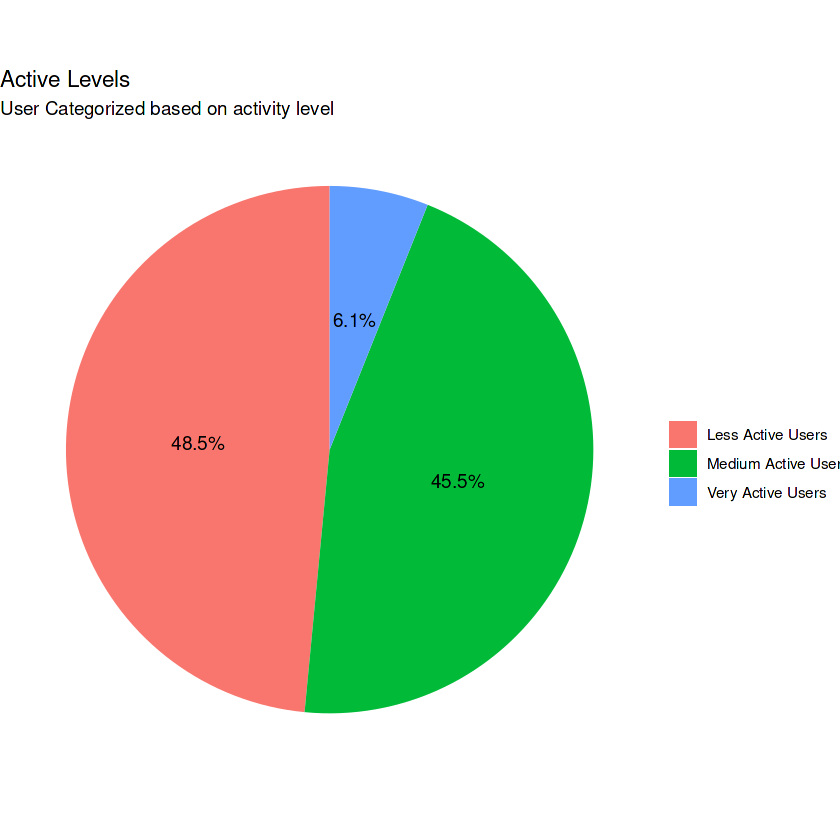

In [11]:
#visualizing the different category of Active user (High, Medium, Less) using pie chart
ggplot(ActivityLevel, aes(x = " ", y= total, fill = active_level)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start=0) +
  theme_void() +
  geom_text(aes(label = percent),
            position = position_stack(vjust = 0.5)) +
  labs(title = "Active Levels", subtitle = "User Categorized based on activity level",
       fill = "")

We can see here that there are very few people who are Very Active. Either they are Medium Active or Less Active

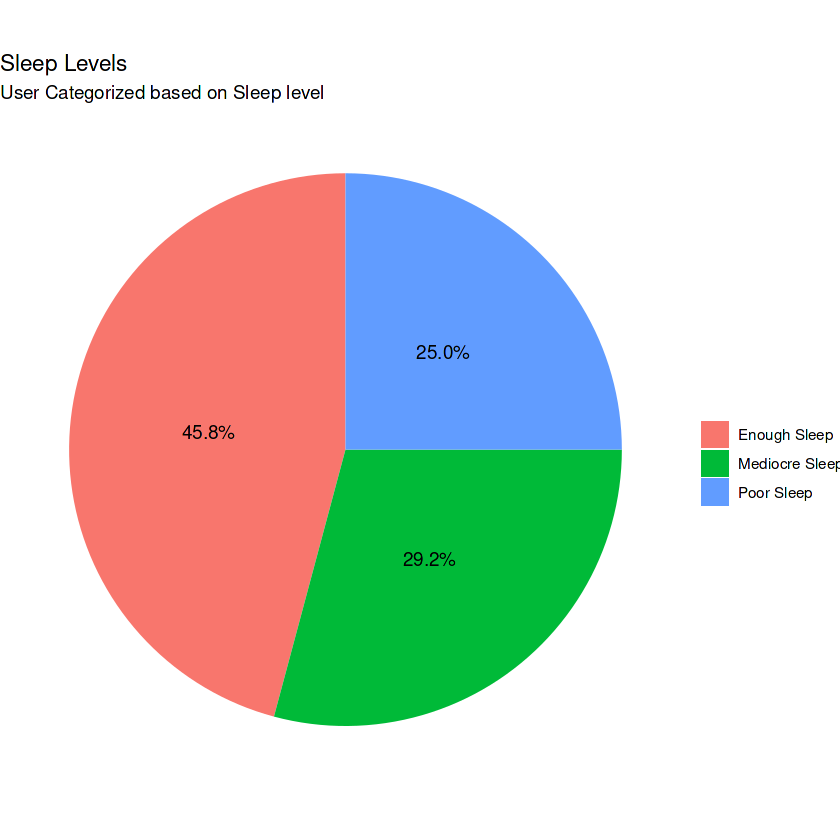

In [12]:
#Visualizing the different category of sleep levels (Enough, Mediocre, poor) of users using pie chart

ggplot(SleepLevel, aes(x = " ", y= total, fill = sleep_level)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start=0) +
  theme_void() +
  geom_text(aes(label = percent),
            position = position_stack(vjust = 0.5)) +
  labs(title = "Sleep Levels", subtitle = "User Categorized based on Sleep level",
       fill = "")

From this pie chart we can see that almost half percentage of users are having enough sleep, which is a good sign. But 25% of users are sleeping less than 5 hours which is concerning.

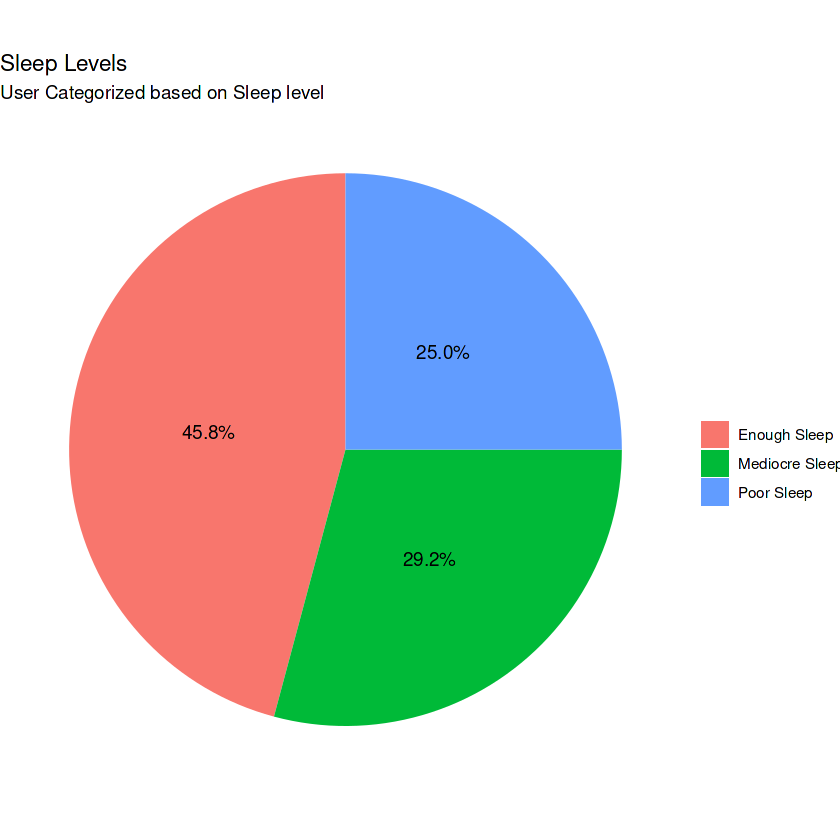

In [13]:
#Visualizing the different category of  (Enough, Mediocre, poor) of users using pie chart

ggplot(SleepLevel, aes(x = " ", y= total, fill = sleep_level)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start=0) +
  theme_void() +
  geom_text(aes(label = percent),
            position = position_stack(vjust = 0.5)) +
  labs(title = "Sleep Levels", subtitle = "User Categorized based on Sleep level",
       fill = "")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


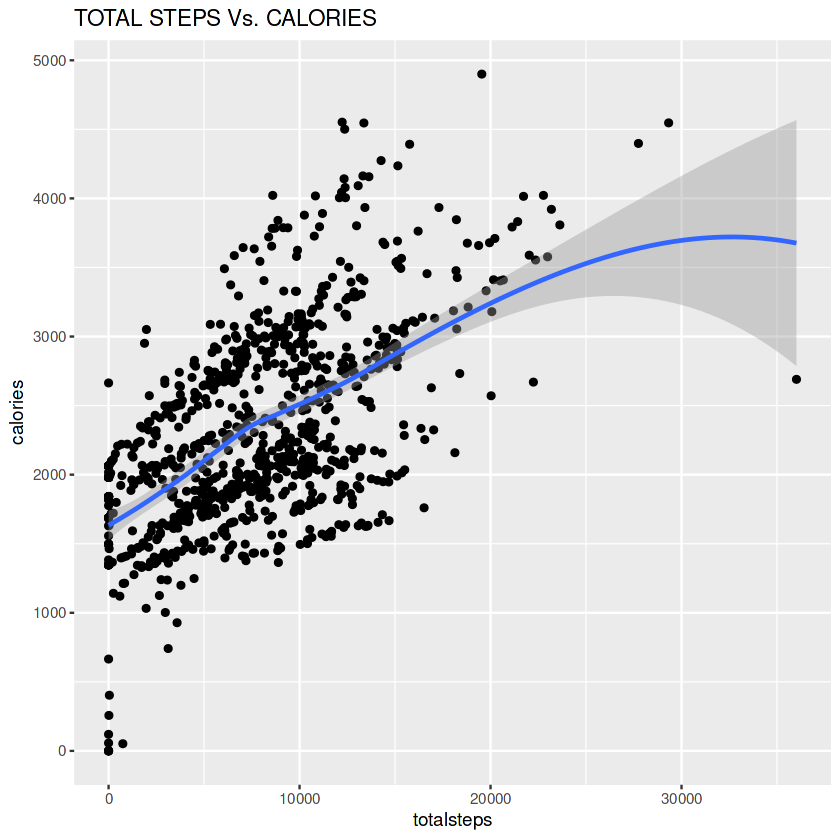

In [14]:
#now we will check if there's a pattern in steps walked vs calories burnt

ggplot(data = activity_daily, aes(x = totalsteps, y = calories)) + 
  geom_point() + geom_smooth() + labs(title ="TOTAL STEPS Vs. CALORIES")


we found that 
1. There is positive relation between total steps vs caloroies burnt
2. Also we can see that most of the calories are being burnt under 10k steps means users are much actively walking under 10k steps

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


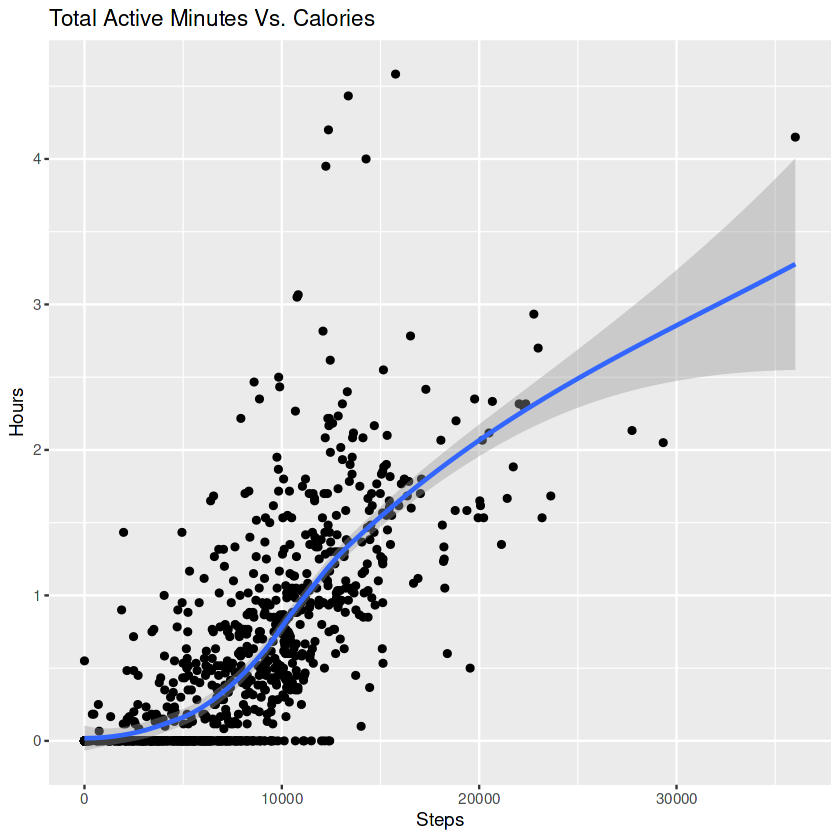

In [15]:
#checking if there's a pattern in Active Minutes vs Calories Burnt

ggplot(data = activity_daily, aes(x = totalsteps, y = (veryactiveminutes + fairlyactiveminutes)/60)) + 
  geom_point() + geom_smooth() + labs(title ="Total Active Minutes Vs. Calories", y="Hours",x="Steps")

Again here we can see that most of the users are highly active in starting 1-2 hours and cover most of the steps in that time period

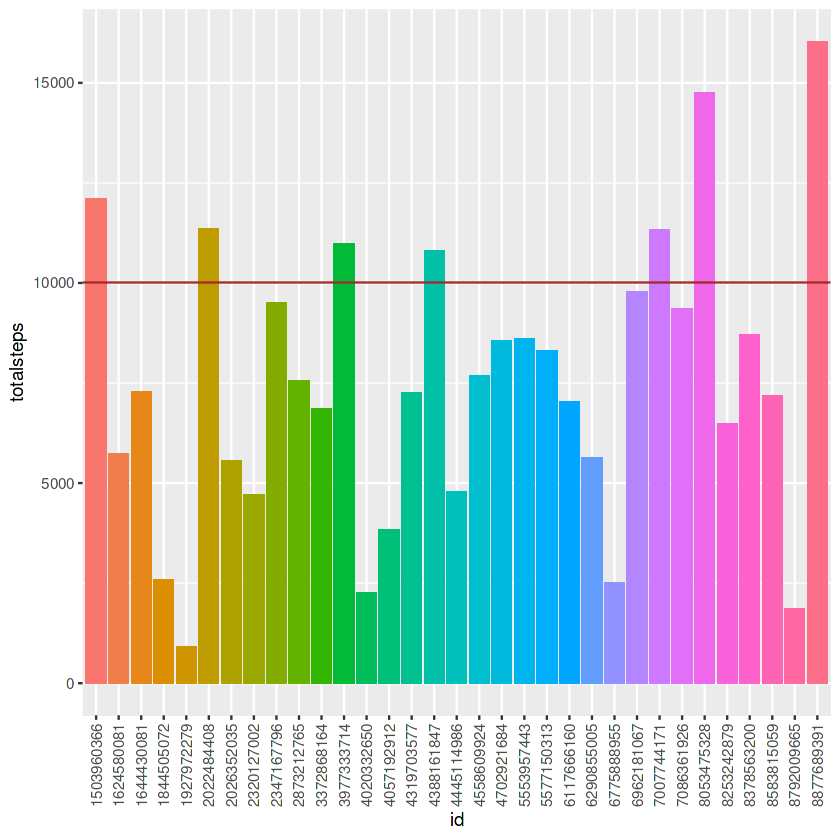

In [16]:
#visualizing steps data with respect to particular users IDs

DailyActivity_Data %>% 
  mutate(id = as.character(id)) %>%
  ggplot(aes(x=id,y=totalsteps,fill=id)) +
  geom_col(show.legend = FALSE) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  geom_hline(yintercept = 10000,color = "brown", linetype = "solid")


From the above chart we can see that only 7 users are crossing threshold of 10k steps per day which is not positive.

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


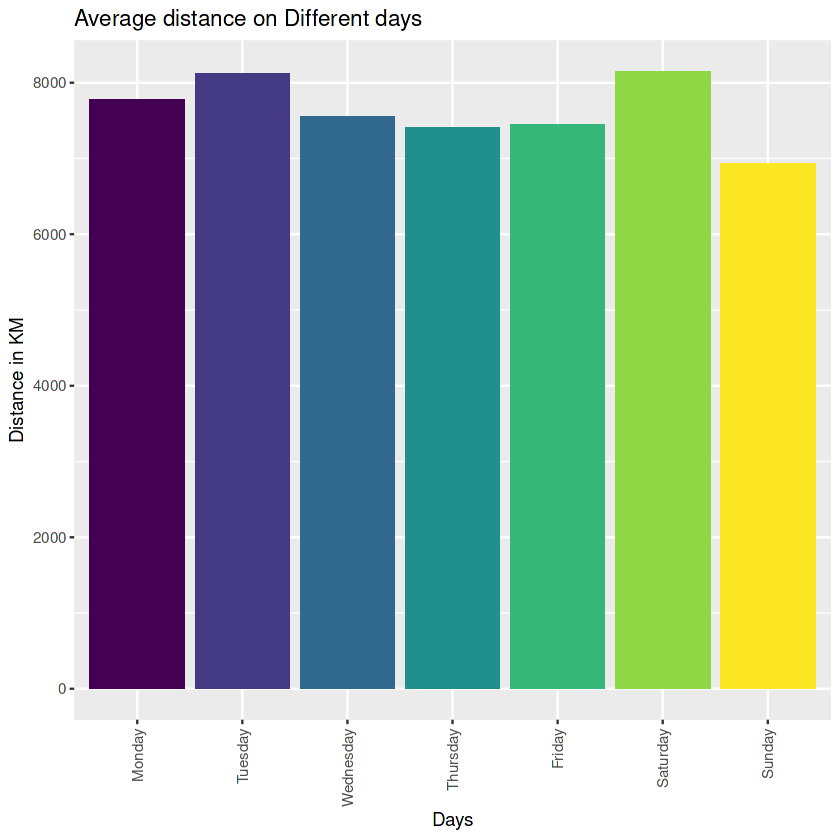

In [17]:
#we can check on what days users are most active and on what days they are less active

head(activity_daily)

weekday_Distance <- activity_daily %>%
  mutate(Weekday = weekdays(as.Date(c(date))))


weekday_Distance$Weekday <-ordered(weekday_Distance$Weekday, levels=c("Monday", 
                                                                "Tuesday", 
                                                                "Wednesday", 
                                                                "Thursday",
                                                                "Friday", 
                                                                "Saturday", 
                                                                "Sunday"))

weekday_Distance <-weekday_Distance %>%
  group_by(Weekday) %>%
  summarize (avg_total_steps = mean(totalsteps))



weekday_Distance %>%
  ggplot(aes(x=Weekday,y=avg_total_steps,fill=Weekday)) +
  geom_col(show.legend = FALSE) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  labs(title = "Average distance on Different days ", y="Distance in KM",x="Days")

From this observation we can conclude that most users are less active mostly on Sundays, which makes sense as people usually spend time relaxing on Sundays.

# Act

Conclusion and Recommendation

From the analysis of data we can say that
1. There is a positive relationship between the total number of steps and the total burned calories
Bellabeat can crete a reward system like on reaching a mark of particular number of steps user will be provided some points.

2. Users are less active on weekends.
Company can create some weekend or sunday challenge to improve more activity on sundays or weekends.

3. Users not getting adequate sleep.
Bellabeat can also send notification regarding sleep data of user and info related to sleep importance.

4. Only few users are touching threshold of 10k steps per day
Bellabeat can keep a track of steps and send notification if user has not completed total required steps for the day.

The main limitation of data is that there is no gender information and as BellaBeat is targeting women for their products. Also the sample size is small. Data is missing for weight info of users.
For a better analysis we need to get more recent data as the fitbit data is of 2016 means it is not updated recently.